In [382]:
import os
from os.path import isfile, join, isdir
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 5)
sns.set(style="whitegrid")

In [383]:
# https://www.music-ir.org/mirex/wiki/2020:Audio_Chord_Estimation
maj_chords = set(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
min_chords = set([c + 'm' for c in maj_chords])

seventh_labels = ['maj7', 'min7', '7']
seventh_chords = set([c + l for l in seventh_labels for c in list(maj_chords)])

inversions_labels = ['/3', 'min/b3', '/5', 'min/5']
inversions_chords = set([c + l for l in inversions_labels for c in list(maj_chords)])

seventh_inversions_labels = ['maj7/3', 'min7/b3', '7/3', 'maj7/5', 'min7/5', '7/5', 'maj7/7', 'min7/b7', '7/b7']

In [384]:
def build_dataset(mypath, sep=' '):
    datasets = []
    dirs = [f for f in os.listdir(mypath) if isdir(join(mypath, f))]
    for directory in dirs:
        for file_name in os.listdir(mypath + directory):
            file_path = join(mypath, directory, file_name)
            if isfile(file_path) and file_path.endswith('.lab'):
                chords_df = read_csv(file_path, sep=sep)
                datasets.append(chords_df)
                
    chords_df = pd.concat(datasets)
    chords_df.columns = ['start', 'end', 'label']
    return chords_df

beatles_df = build_dataset('data/beatles/chordlabs/')
queen_df = build_dataset('data/queen/chordlabs/', sep='\t')
cking_df = build_dataset('data/carole_king/', sep='\t')
chords_df = pd.concat([beatles_df, queen_df, mjackson_df, cking_df])

In [385]:
# For details, see https://www.music-ir.org/mirex/wiki/2020:Audio_Chord_Estimation
chords_df['label'] = chords_df.label.str.replace('Db', 'C#', regex=False)
chords_df['label'] = chords_df.label.str.replace('Eb', 'D#', regex=False)
chords_df['label'] = chords_df.label.str.replace('Gb', 'F#', regex=False)
chords_df['label'] = chords_df.label.str.replace('Ab', 'G#', regex=False)
chords_df['label'] = chords_df.label.str.replace('Bb', 'A#', regex=False)

chords_df['label'] = chords_df.label.str.replace('C:maj', 'C', regex=False)
chords_df['label'] = chords_df.label.str.replace('C#:maj', 'C#', regex=False)
chords_df['label'] = chords_df.label.str.replace('D:maj', 'D', regex=False)
chords_df['label'] = chords_df.label.str.replace('D#:maj', 'D#', regex=False)
chords_df['label'] = chords_df.label.str.replace('E:maj', 'E', regex=False)
chords_df['label'] = chords_df.label.str.replace('F:maj', 'F', regex=False)
chords_df['label'] = chords_df.label.str.replace('F#:maj', 'F#', regex=False)
chords_df['label'] = chords_df.label.str.replace('G:maj', 'G', regex=False)
chords_df['label'] = chords_df.label.str.replace('G#:maj', 'G#', regex=False)
chords_df['label'] = chords_df.label.str.replace('A:maj', 'A', regex=False)
chords_df['label'] = chords_df.label.str.replace('A#:maj', 'A#', regex=False)
chords_df['label'] = chords_df.label.str.replace('B:maj', 'B', regex=False)

chords_df['label'] = chords_df.label.str.replace(':maj7', 'maj7', regex=False)
chords_df['label'] = chords_df.label.str.replace(':min7', 'min7', regex=False)
chords_df['label'] = chords_df.label.str.replace(':min', 'm', regex=True)
chords_df['label'] = chords_df.label.str.replace(':7', '7', regex=True)

In [386]:
def mark_vocabulary(label):
    if label in maj_chords:
        return 'maj'
    elif label in min_chords:
        return 'min'
    elif label in seventh_chords:
        return 'seventh'
    elif label in inversions_chords:
        return 'inv'
    elif label == 'N':
        return 'N'
    else:
        return 'other'

chords_df['vocab'] = chords_df.label.apply(lambda x: mark_vocabulary(x))

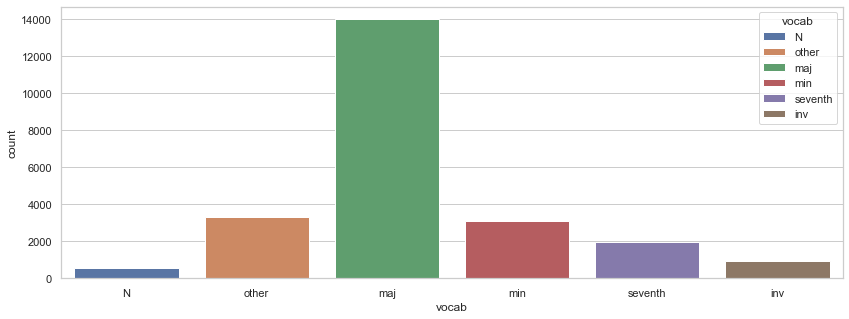

In [387]:
chords_df
ax = sns.countplot(x="vocab", hue='vocab', data=chords_df, dodge=False)

In [388]:
chords_df.groupby('vocab').size() / len(chords_df)

vocab
N          0.023776
inv        0.039891
maj        0.584596
min        0.129887
other      0.138928
seventh    0.082922
dtype: float64

In [389]:
chords_df.label.unique()

array(['N', 'G:sus4(b7)', 'G', 'C', 'F', 'D', 'Bm', 'Em', 'D7', 'G/5',
       'G:sus4/5', 'F9(*7)', 'Em/b3', 'B', 'G7', 'B7', 'D#m', 'C#', 'A#m',
       'Emin7', 'A', 'F#m', 'F:dim', 'Gm', 'D:9', 'A7', 'C#m', 'G#', 'E6',
       'E', 'G#m', 'B:aug', 'Dm', 'A#', 'A#7', 'A:sus4', 'A:9(11)', 'Am',
       'C7', 'F7', 'F#m/5', 'Gm/b3', 'D/5', 'A/3', 'A7/5', 'Bm/5',
       'A7/b7', 'C:9', 'E7', 'F#', 'F#:(1,4,b7)', 'D#', 'Em/5', 'C/3',
       'G:sus4(2)/2', 'G/3', 'G#:aug', 'C/5', 'C#m/5', 'A/5', 'A/7',
       'A/b7', 'A/6', 'A/b6', 'C/7', 'C/6', 'C/2', 'G:sus4(2)', 'Em/b7',
       'Em/6', 'D/7', 'D/6', 'A/2', 'B/5', 'D(*1)/#1', 'E7/5', 'F#/5',
       'D7/5', 'G/2', 'G/#4', 'A7/3', 'E:aug', 'B:9', 'E/5', 'E/7',
       'C#m/b7', 'Dm/2', 'Dm/b3', 'Dm/4', 'Dm/5', 'E:9', 'A:aug',
       'Dmin7(2,*b3,4)', 'D:(1,4)', 'D#:(1,4)', 'E:(1,4)', 'C:(1)',
       'B:(1)', 'D6', 'A(9)/3', 'E:sus4(b7)', 'D/3', 'E:sus4', 'Amin7',
       'D#:hdim7', 'A:9', 'A7(*5,13)', 'D:dim', 'A7(13)', 'G#7', 'D:dim7',
     

In [390]:
other = chords_df[chords_df.vocab == 'other']
other.groupby('label').size().sort_values(ascending=False) / len(other)

label
Am/b7       0.097921
Em/b3       0.086472
F6          0.073516
C/7         0.023200
F#:sus4     0.015667
              ...   
C#/#4       0.000301
E7sus       0.000301
C#/7        0.000301
C#7(*b5)    0.000301
D:9(11)     0.000301
Length: 395, dtype: float64